In [2]:
import tensorflow as tf

In [3]:
import ssl
# 下载过程中由于证书验证不通过，取消证书验证
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
import matplotlib.pyplot as plt

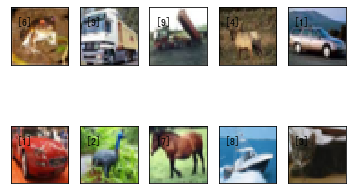

In [6]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with, which means, except for tensorflow and keras, you can also use pytorch/caffe/... . The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3. All 50000 images are classified into ten categories.¶

In [7]:
print(x_train.shape)

(50000, 32, 32, 3)


In [8]:
print(y_train.shape)

(50000, 1)


In [9]:
x_train = tf.cast(x_train/255,tf.float32)
x_test = tf.cast(x_test/255,tf.float32)

In [10]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

## baseline - cifar_mode

In [22]:
#build the model using sequential
cifar_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,[3,3],activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [23]:
cifar_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 80)               

In [24]:
cifar_model.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])

In [25]:
cifar_model.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 12s 232us/sample - loss: 1.9068 - accuracy: 0.2887
Epoch 2/5
50000/50000 [==============================] - 11s 217us/sample - loss: 1.6164 - accuracy: 0.4124
Epoch 3/5
50000/50000 [==============================] - 11s 211us/sample - loss: 1.5037 - accuracy: 0.4597
Epoch 4/5
50000/50000 [==============================] - 11s 217us/sample - loss: 1.4196 - accuracy: 0.4928
Epoch 5/5
50000/50000 [==============================] - 11s 218us/sample - loss: 1.3596 - accuracy: 0.5179


## 去除第一层的池化层

In [20]:
#build the model using sequential
cifar_model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,[3,3],activation='relu',input_shape=(32,32,3)),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(16,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_1.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_1.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 23s 454us/sample - loss: 1.8135 - accuracy: 0.3297
Epoch 2/5
50000/50000 [==============================] - 21s 422us/sample - loss: 1.5003 - accuracy: 0.4559
Epoch 3/5
50000/50000 [==============================] - 21s 420us/sample - loss: 1.3508 - accuracy: 0.5169
Epoch 4/5
50000/50000 [==============================] - 21s 423us/sample - loss: 1.2442 - accuracy: 0.5567
Epoch 5/5
50000/50000 [==============================] - 21s 423us/sample - loss: 1.1623 - accuracy: 0.5920


### 增加filter数目

In [21]:
#build the model using sequential
cifar_model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_2.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_2.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 33s 666us/sample - loss: 1.7977 - accuracy: 0.3478
Epoch 2/5
50000/50000 [==============================] - 33s 650us/sample - loss: 1.4014 - accuracy: 0.5019
Epoch 3/5
50000/50000 [==============================] - 32s 635us/sample - loss: 1.2409 - accuracy: 0.5672
Epoch 4/5
50000/50000 [==============================] - 31s 622us/sample - loss: 1.1298 - accuracy: 0.6076
Epoch 5/5
50000/50000 [==============================] - 31s 622us/sample - loss: 1.0521 - accuracy: 0.6375


## 增加卷积层

In [26]:
#build the model using sequential
cifar_model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_3.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_3.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.7815 - accuracy: 0.3507
Epoch 2/5
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.3659 - accuracy: 0.5152
Epoch 3/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.1663 - accuracy: 0.5928
Epoch 4/5
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.0472 - accuracy: 0.6369
Epoch 5/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.9612 - accuracy: 0.6709


## 增加全连接神经网络隐含层神经元数目

In [13]:
#build the model using sequential
cifar_model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_4.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_4.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.6096 - accuracy: 0.4216
Epoch 2/5
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.1926 - accuracy: 0.5786
Epoch 3/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.0116 - accuracy: 0.6474
Epoch 4/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.8788 - accuracy: 0.6948
Epoch 5/5
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.7700 - accuracy: 0.7334


## 增加filter维度
##### 该效果不好，说明，filter维度大，并不能使得model更完善

In [28]:
#build the model using sequential
cifar_model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[5,5],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[5,5],activation='relu'),
    tf.keras.layers.Conv2D(64,[5,5],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_5.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_5.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 99s 2ms/sample - loss: 1.8269 - accuracy: 0.3352
Epoch 2/5
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.4210 - accuracy: 0.4940
Epoch 3/5
50000/50000 [==============================] - 95s 2ms/sample - loss: 1.2110 - accuracy: 0.5764
Epoch 4/5
50000/50000 [==============================] - 94s 2ms/sample - loss: 1.0822 - accuracy: 0.6246
Epoch 5/5
50000/50000 [==============================] - 97s 2ms/sample - loss: 0.9772 - accuracy: 0.6619


In [29]:
#build the model using sequential
cifar_model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[7,7],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[5,5],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_5.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_5.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.8884 - accuracy: 0.3189
Epoch 2/5
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.5307 - accuracy: 0.4511
Epoch 3/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.3625 - accuracy: 0.5178
Epoch 4/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.2413 - accuracy: 0.5640
Epoch 5/5
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.1419 - accuracy: 0.6002


## 增加卷积层

In [31]:
#build the model using sequential
cifar_model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,[3,3],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
    tf.keras.layers.Conv2D(16,[3,3],activation='relu'),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_6.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_6.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.7155 - accuracy: 0.3793
Epoch 2/5
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.3115 - accuracy: 0.5358
Epoch 3/5
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.0974 - accuracy: 0.6178
Epoch 4/5
50000/50000 [==============================] - 81s 2ms/sample - loss: 0.9593 - accuracy: 0.6685
Epoch 5/5
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.8461 - accuracy: 0.7060


In [11]:
#build the model using sequential
cifar_model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,[3,3],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
    tf.keras.layers.Conv2D(16,[3,3],activation='relu'),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_7.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_7.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.7228 - accuracy: 0.3780
Epoch 2/5
50000/50000 [==============================] - 71s 1ms/sample - loss: 1.2658 - accuracy: 0.5552
Epoch 3/5
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.0537 - accuracy: 0.6313
Epoch 4/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.9169 - accuracy: 0.6833
Epoch 5/5
50000/50000 [==============================] - 82s 2ms/sample - loss: 0.7868 - accuracy: 0.7280


## 更改学习率

In [12]:
#build the model using sequential
cifar_model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,[3,3],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量
    tf.keras.layers.Conv2D(16,[3,3],activation='relu'),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_7.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 0.002),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_7.fit(x_train,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 95s 2ms/sample - loss: 1.7238 - accuracy: 0.3724
Epoch 2/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.3617 - accuracy: 0.5176
Epoch 3/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.1519 - accuracy: 0.5998
Epoch 4/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.0058 - accuracy: 0.6532
Epoch 5/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.8990 - accuracy: 0.6896


# cifar_model_4的效果比较好

In [14]:
cifar_model_4.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8835604292869568, 0.6971]

In [26]:
#build the model using sequential
cifar_model_4_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,[3,3],activation='relu',input_shape=(32,32,3)),#增加filter个数，增加特征提取数量

    tf.keras.layers.Conv2D(16,[5,5],activation='relu'),
    #     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[7,7],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_4_1.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_4_1.fit(x_train,y_train,batch_size=400,epochs = 20)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 45s 898us/sample - loss: 1.9828 - accuracy: 0.2863
Epoch 2/20
50000/50000 [==============================] - 44s 876us/sample - loss: 1.6596 - accuracy: 0.4090
Epoch 3/20
50000/50000 [==============================] - 44s 881us/sample - loss: 1.5062 - accuracy: 0.4652
Epoch 4/20
50000/50000 [==============================] - 44s 879us/sample - loss: 1.3938 - accuracy: 0.5045
Epoch 5/20
50000/50000 [==============================] - 44s 872us/sample - loss: 1.3180 - accuracy: 0.5345
Epoch 6/20
50000/50000 [==============================] - 43s 869us/sample - loss: 1.2389 - accuracy: 0.5652
Epoch 7/20
50000/50000 [==============================] - 44s 873us/sample - loss: 1.1694 - accuracy: 0.5900
Epoch 8/20
50000/50000 [==============================] - 44s 873us/sample - loss: 1.1106 - accuracy: 0.6124
Epoch 9/20
50000/50000 [==============================] - 44s 887us/sample - loss: 1.0629 - accuracy: 0.6

In [27]:
cifar_model_4_1.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9225922357559204, 0.6912]

## same padding -padding = 3

## 输入层加入padding

In [31]:
import numpy as np

In [32]:
x_train_pad = np.pad(x_train,((0,0),(3,3),(3,3),(0,0)),'constant', constant_values=(0,0)) 

In [35]:
#build the model using sequential
cifar_model_4_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3],activation='relu',input_shape=(38,38,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_4_2.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_4_2.fit(x_train_pad,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.6324 - accuracy: 0.4075
Epoch 2/5
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.1839 - accuracy: 0.5833
Epoch 3/5
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.9911 - accuracy: 0.6573
Epoch 4/5
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.8600 - accuracy: 0.7029
Epoch 5/5
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.7524 - accuracy: 0.7381


In [36]:
#build the model using sequential
cifar_model_4_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3],activation='relu',input_shape=(38,38,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_4_2.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_4_2.fit(x_train_pad,y_train,batch_size=100,epochs = 10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.6790 - accuracy: 0.3948
Epoch 2/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.1954 - accuracy: 0.5825
Epoch 3/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.9974 - accuracy: 0.6552
Epoch 4/10
50000/50000 [==============================] - 105s 2ms/sample - loss: 0.8645 - accuracy: 0.7020
Epoch 5/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.7559 - accuracy: 0.7417
Epoch 6/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.6638 - accuracy: 0.7711
Epoch 7/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.5824 - accuracy: 0.7994
Epoch 8/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.5190 - accuracy: 0.8226
Epoch 9/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.4726 - accuracy: 0.8389
Epoch

In [38]:
x_test_pad = np.pad(x_test,((0,0),(3,3),(3,3),(0,0)),'constant', constant_values=(0,0)) 

In [40]:
cifar_model_4_2.evaluate(x_test_pad,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0919561511039735, 0.7115]

In [137]:
x_train_pad_neg = np.pad(x_train,((0,0),(3,3),(3,3),(0,0)),'constant', constant_values=(-1,-1)) 

In [ ]:
#build the model using sequential
cifar_model_4_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3],activation='relu',input_shape=(38,38,3)),#增加filter个数，增加特征提取数量
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 去除池化层，减少信息损失
    tf.keras.layers.Conv2D(32,[3,3],activation='relu'),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])
cifar_model_4_3.compile(optmizer= tf.keras.optimizers.SGD(learning_rate = 1e-3),
                   validation_split = 0.1,
                   shuffle = True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics=["accuracy"])
cifar_model_4_3.fit(x_train_pad_neg,y_train,batch_size=100,epochs = 5)

Train on 50000 samples
Epoch 1/5
43400/50000 [=========================>....] - ETA: 14s - loss: 1.6811 - accuracy: 0.3911